# 4. Gradient Descent: Implemnting Adam Optimizer

In this seciton we refine our base momentum optimizer by adding bias correction, second moving average for learning rate.

We achieve the functionality of Adam optimizer.

We will train a function with two variables: `x1` (salaries) and `x2` (investments).

In [116]:
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable

np.random.seed(42)

In [117]:
def show_history(history: dict):
    """
    Display the training history in a tabular format.

    Args:
        history (dict): A dictionary containing the training history with keys as column names and values as lists of data points.
    """
    # Create a PrettyTable object to display the history
    table = PrettyTable()

    # Add each key and its corresponding values as a column in the table
    for key in history.keys():
        table.add_column(key, history[key])

    # Print the table
    print(table)

In [118]:
# We will calculate
# x1 - salary, x2 - investments return
# y = 0.3 * salary + 0.1 * investments_return + 10

In [119]:
# Number of samples
n_samples = 250

# Generate random salaries between 100 and 1100
salaries = np.random.random(n_samples) * 1000 + 100

# Generate random investments between 10 and 110
investments = np.random.random(n_samples) * 100 + 10

# Define target weights and bias
TARGET_W1 = 0.3
TARGET_W2 = 0.1
TARGET_B = 10

# Calculate target values with some added noise
y = (
    (TARGET_W1 * salaries)
    + (TARGET_W2 * investments)
    + TARGET_B
    + np.random.normal(0, 1, n_samples)
)

# Assign salaries and investments to x1 and x2
x1 = salaries
x2 = investments

# Split the data into training and testing sets
train_split = int(0.8 * n_samples)

# Create testing sets
y_test = y[train_split:]
x1_test = x1[train_split:]
x2_test = x2[train_split:]

# Create training sets
y = y[:train_split]
x1 = x1[:train_split]
x2 = x2[:train_split]

## Plot the training data

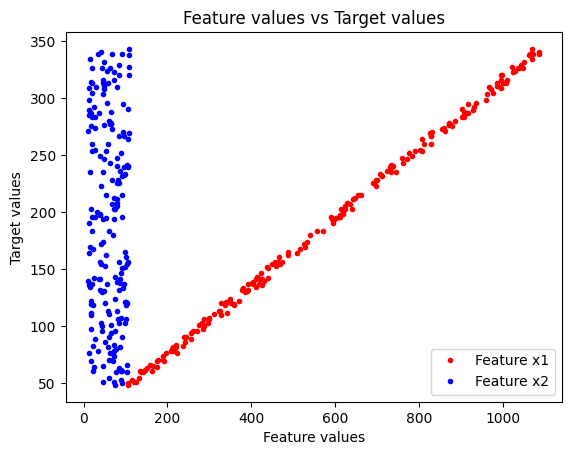

In [120]:
plt.plot(x1, y, "r.", label="Feature x1")
plt.plot(x2, y, "b.", label="Feature x2")
plt.xlabel("Feature values")
plt.ylabel("Target values")
plt.title("Feature values vs Target values")
plt.legend()
plt.show()

In [121]:
class AdamOptimizer:
    def __init__(self, param, beta_m=0.9, beta_v=0.999):
        self.param = param
        self.beta_m = beta_m
        self.beta_v = beta_v
        self.momentum = 0
        self.prev_momentum = 0
        self.lr = 0.09
        self.v = 0
        self.prev_v = 0

    def step(self, gradient, epoch):
        # Store previous momentum and velocity
        self.prev_momentum = self.momentum
        self.prev_v = self.v

        # Calculate the moving average of the momentum and the squared gradients
        self.momentum = (self.beta_m * self.prev_momentum) + (1 - self.beta_m) * gradient
        self.v = (self.beta_v * self.prev_v) + (1 - self.beta_v) * (gradient**2)

        # Bias correction
        momentum_hat = self.momentum / (1 - self.beta_m ** (epoch + 1))
        v_hat = self.v / (1 - self.beta_v ** (epoch + 1))

        # Update parameter with corrected values
        learning_rate = self.lr / (np.sqrt(v_hat) + 1e-8)
        self.param -= learning_rate * momentum_hat

    def get_param(self):
        return self.param

# Initialize weights and biases with random values
w1, w2, b = np.random.normal(0, 1, 3)

# Create Adam optimizer instances for each parameter
w1_Optimizer = AdamOptimizer(w1)
w2_Optimizer = AdamOptimizer(w2)
b_Optimizer = AdamOptimizer(b)


In [122]:
epoch = 0
history = {
    "epoch": [],
    "loss": [],
    "w1_gradient": [],
    "w2_gradient": [],
    "w1": [],
    "w2": [],
    "w1_lr": [],
    "w2_lr": [],
}

while True:
    # Get current parameters
    w1 = w1_Optimizer.get_param()
    w2 = w2_Optimizer.get_param()
    b = b_Optimizer.get_param()

    # Predict target values
    y_pred = w1 * x1 + w2 * x2 + b
    errors = y_pred - y

    # Calculate loss
    loss = np.mean(np.mean(errors**2))

    # Stop condition
    if epoch > 1000:
        break

    # Calculate gradients
    w1_gradient = (2 / len(x1)) * np.sum(errors * x1)
    w2_gradient = (2 / len(x2)) * np.sum(errors * x2)
    b_gradient = (2 / len(x1)) * np.sum(errors)

    # Round gradients for better readability
    w1_gradient = np.round(w1_gradient, 3)
    w2_gradient = np.round(w2_gradient, 3)
    b_gradient = np.round(b_gradient, 3)

    # Update parameters using Adam optimizer
    w1_Optimizer.step(w1_gradient, epoch)
    w2_Optimizer.step(w2_gradient, epoch)
    b_Optimizer.step(b_gradient, epoch)

    # Record history
    history["epoch"].append(epoch)
    history["loss"].append(float(f"{loss:.3f}"))
    history["w1_gradient"].append(w1_gradient)
    history["w2_gradient"].append(w2_gradient)
    history["w1"].append(float(f"{w1:.3f}"))
    history["w2"].append(float(f"{w2:.3f}"))
    history["w1_lr"].append(f"{w1_Optimizer.lr:.7f}")
    history["w2_lr"].append(f"{b_Optimizer.lr:.7f}")

    # Increment epoch
    epoch += 1

In [123]:
# show_history(history)

Final loss: 6.819


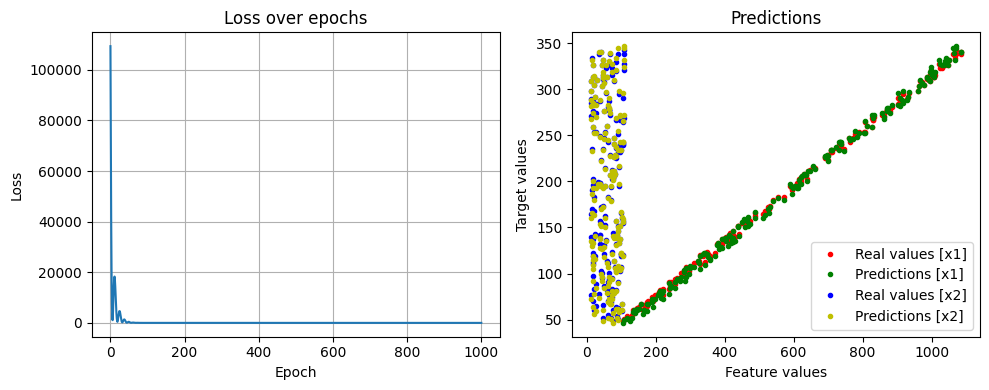

In [126]:
# Get the current parameters from the optimizers
w1 = w1_Optimizer.get_param()
w2 = w2_Optimizer.get_param()
b = b_Optimizer.get_param()

# Create subplots for visualizing the results
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot the real and predicted values for the training data
ax[1].plot(x1, y, "r.", label="Real values [x1]")
ax[1].plot(x1, w1 * x1 + w2 * x2 + b, "g.", label="Predictions [x1]")
ax[1].plot(x2, y, "b.", label="Real values [x2]")
ax[1].plot(x2, w1 * x1 + w2 * x2 + b, "y.", label="Predictions [x2]")
ax[1].set_title("Predictions")
ax[1].set_xlabel("Feature values")
ax[1].set_ylabel("Target values")
ax[1].legend()

# Plot the loss over epochs
ax[0].plot(history["epoch"], history["loss"])
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss over epochs")
ax[0].grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Print the final loss
print(f"Final loss: {history['loss'][-1]}")

# Display the plots
plt.show()

Test loss: 2.5048854358864414


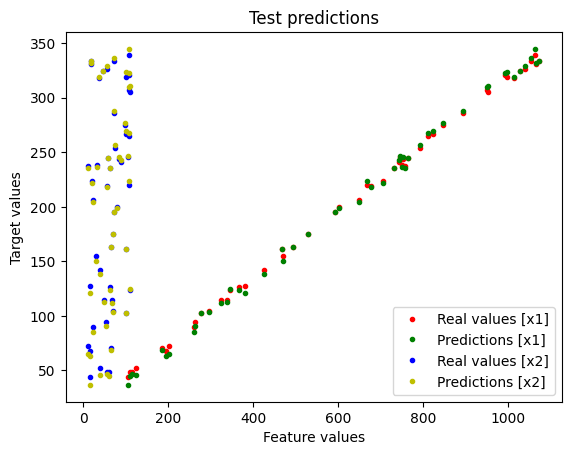

In [125]:
# Predict target values for the test data
y_pred = w1 * x1_test + w2 * x2_test + b

# Calculate errors
errors = y_pred - y_test

# Calculate mean absolute error as loss
loss = np.mean(np.abs(errors))
print(f"Test loss: {loss}")

# Plot real vs predicted values for feature x1
plt.plot(x1_test, y_test, "r.", label="Real values [x1]")
plt.plot(x1_test, y_pred, "g.", label="Predictions [x1]")

# Plot real vs predicted values for feature x2
plt.plot(x2_test, y_test, "b.", label="Real values [x2]")
plt.plot(x2_test, y_pred, "y.", label="Predictions [x2]")

# Add title and labels
plt.title("Test predictions")
plt.xlabel("Feature values")
plt.ylabel("Target values")
plt.legend()

# Display the plot
plt.show()
